5장의 와인데이터를 이용하여 k-NN모델과 SGD 모델을 만들어 
k-NN_성명.ipynb, SGD_성명.ipynb 두개를 만들어 제출합니다. 

조건
1. 반드시 훈련데이터와 테스트 데이터로 나누고, 마지막줄에 test 데이터로 평가 한결과를 출력하면 됩니다.
2. K-NN에서는 Neighbour의 3~10중 가장 좋은 성능을 보이는 것을 찾으시오. 
3. SGD의 loss Function 은 hinge를 사용합니다. 

그래프는 그릴필요 없습니다.

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [3]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

train_score_list = []
test_score_list = []
for n in range(3, 11):
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(train_scaled, train_target)
    
    train_score = kn.score(train_scaled, train_target)
    test_scores = kn.score(test_scaled, test_target)
    
    print(f"k={n}")
    train_score_list.append(train_score)
    print("train_score:", train_score)
    test_score_list.append(test_scores)
    print("test_score:", test_scores)
    print()
    
print(f"가장 좋은 성능 모델: k={test_score_list.index(max(test_score_list))+3} 일때 test_score = {max(test_score_list)}")

k=3
train_score: 0.9253415431979989
test_score: 0.8361538461538461

k=4
train_score: 0.90186646142005
test_score: 0.8253846153846154

k=5
train_score: 0.9020588801231479
test_score: 0.8338461538461538

k=6
train_score: 0.892245526265153
test_score: 0.8238461538461539

k=7
train_score: 0.895516644217818
test_score: 0.8338461538461538

k=8
train_score: 0.885703290359823
test_score: 0.8323076923076923

k=9
train_score: 0.88223975370406
test_score: 0.8430769230769231

k=10
train_score: 0.8778141235328074
test_score: 0.8384615384615385

가장 좋은 성능 모델: k=9 일때 test_score = 0.8430769230769231


k=3, train_score=0.9253415431979989, test_score=0.8361538461538461
k=4, train_score=0.90186646142005, test_score=0.8253846153846154
k=5, train_score=0.9020588801231479, test_score=0.8338461538461538
k=6, train_score=0.892245526265153, test_score=0.8238461538461539
k=7, train_score=0.895516644217818, test_score=0.8338461538461538
k=8, train_score=0.885703290359823, test_score=0.8323076923076923
k=9, train_score=0.88223975370406, test_score=0.8430769230769231
k=10, train_score=0.8778141235328074, test_score=0.8384615384615385


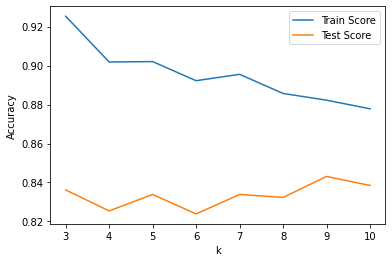

가장 좋은 성능 모델: k=9 일때 test_score = 0.8430769230769231


In [5]:
import matplotlib.pyplot as plt

def evaluate_knn(k_range, train_data, train_labels, test_data, test_labels):
    train_scores = []
    test_scores = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_data, train_labels)
        
        train_scores.append(knn.score(train_data, train_labels))
        test_scores.append(knn.score(test_data, test_labels))
        
        print(f"k={k}, train_score={train_scores[-1]}, test_score={test_scores[-1]}")
    
    # 시각화
    plt.plot(k_range, train_scores, label='Train Score')
    plt.plot(k_range, test_scores, label='Test Score')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    best_k = test_scores.index(max(test_scores)) + k_range[0]
    print(f"가장 좋은 성능 모델: k={best_k} 일때 test_score = {max(test_scores)}")

k_values = range(3, 11)
evaluate_knn(k_values, train_scaled, train_target, test_scaled, test_target)
